In [1]:
import pandas as pd
import joblib
from flask import Flask, request, jsonify
import nest_asyncio
import requests

In [2]:
model = joblib.load("fraud_model.pkl")
scaler = joblib.load("scaler.pkl")

In [3]:
app = Flask(__name__)

@app.route("/", methods=["GET"])
def home():
    return jsonify({
        "message": "Welcome to Fraud Detection API 🚀",
        "usage": "Send POST request to /predict with transaction features"
    })

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.json.get("features", None)
        if data is None:
            return jsonify({"error": "No features provided"}), 400

        # Scale input
        data_scaled = scaler.transform([data])

        # Predict
        prediction = model.predict(data_scaled)[0]
        proba = model.predict_proba(data_scaled)[0][1]

        return jsonify({
            "prediction": int(prediction),
            "fraud_probability": float(proba)
        })

    except Exception as e:
        return jsonify({"error": str(e)}), 500


In [4]:
nest_asyncio.apply()
import threading

# Run Flask in a separate thread so it doesn't block notebook
def run_app():
    app.run(port=5000, debug=False)

thread = threading.Thread(target=run_app)
thread.start()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [5]:
nest_asyncio.apply()
import threading

# Run Flask in a separate thread so it doesn't block notebook
def run_app():
    app.run(port=5000, debug=False)

thread = threading.Thread(target=run_app)
thread.start()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [6]:
data = pd.read_csv("creditcard_small.csv")

# Pick a random row
sample_features = data.drop("Class", axis=1).sample(1).values.flatten().tolist()

# Send POST request
response = requests.post(
    "http://127.0.0.1:5000/predict",
    json={"features": sample_features}
)

print("Sample features sent:", sample_features)
print("Prediction response:", response.json())

Sample features sent: [4540.0, 0.7097041094316437, -1.5893891629456645, 0.6281796338743251, 0.5495310353342123, -0.9170533082190097, 2.2561477912256724, -1.788121371221356, 1.4830216333882027, -0.4138265839713186, -0.2453448644076345, 0.3996645399237513, -1.7377658429010692, 2.7690154167356105, 0.2283992238003029, -1.386880244490189, -0.3014397056637175, -0.060842772517242, 0.1538334564439181, -0.8317281160974364, 1.1652874208045738, 1.23788961204178, 1.9927856337806635, 0.351999889889972, 1.1909668937220288, 1.749951596799084, -1.8164289875824653, 2.267908092066328, 0.7700360309265492, 42.18]
Prediction response: {'fraud_probability': 0.02, 'prediction': 0}


In [7]:
home_response = requests.get("http://127.0.0.1:5000/").json()
print("Home route response:", home_response)

Home route response: {'message': 'Welcome to Fraud Detection API 🚀', 'usage': 'Send POST request to /predict with transaction features'}


In [8]:
import requests
response = requests.get("http://127.0.0.1:5000/")
print(response.json()

SyntaxError: incomplete input (1217027992.py, line 3)

In [9]:
import requests
response = requests.get("http://127.0.0.1:5000/")
print(response.json()

SyntaxError: incomplete input (1217027992.py, line 3)

In [10]:
sample_features = [0.1, -1.2, 0.5, 0.0, -0.3, 1.1, 0.2, 0.0, -0.5, 0.3,
                   0.1, -0.2, 0.4, 0.0, -0.1, 0.5, 0.2, -0.3, 0.1, 0.0,
                   0.2, -0.1, 0.3, 0.0, -0.2, 0.1, 0.0, 0.2, -0.1, 0.0]  # replace with real 30 features

response = requests.post(
    "http://127.0.0.1:5000/predict",
    json={"features": sample_features}
)
print(response.json())


{'fraud_probability': 0.0, 'prediction': 0}


In [11]:
sample_features = [0.1, -1.2, 0.5, 0.0, -0.3, 1.1, 0.2, 0.0, -0.5, 0.3,
                   0.1, -0.2, 0.4, 0.0, -0.1, 0.5, 0.2, -0.3, 0.1, 0.0,
                   0.2, -0.1, 0.3, 0.0, -0.2, 0.1, 0.0, 0.2, -0.1, 0.0]  # replace with real 30 features

response = requests.post(
    "http://127.0.0.1:5000/predict",
    json={"features": sample_features}
)
print(response.json())


{'fraud_probability': 0.0, 'prediction': 0}


In [12]:
import pandas as pd

# Assuming you have feature columns from your training dataset
feature_columns = real_data.drop("Class", axis=1).columns.tolist()

# Inside your predict() function:
data_df = pd.DataFrame([data], columns=feature_columns)  # wrap list into DataFrame
data_scaled = scaler.transform(data_df)

NameError: name 'real_data' is not defined

In [13]:
import pandas as pd
import joblib

# Load your dataset (same one used for training)
real_data = pd.read_csv("creditcard_small.csv")

# Load your scaler & model
scaler = joblib.load("scaler.pkl")
model = joblib.load("fraud_model.pkl")

# Get feature columns
feature_columns = real_data.drop("Class", axis=1).columns.tolist()

# Example input data (replace with actual transaction features)
data = [0.1, -1.2, 0.5, 0.0, -0.3, 1.1, 0.2, 0.0, -0.5, 0.3, 
        0.1, -0.2, 0.4, 0.0, -0.1, 0.5, 0.2, -0.3, 0.1, 0.0,
        0.2, -0.1, 0.3, 0.0, -0.2, 0.1, 0.0, 0.2, -0.1, 0.0]

# Convert list to DataFrame with correct column names
data_df = pd.DataFrame([data], columns=feature_columns)

# Scale & predict
data_scaled = scaler.transform(data_df)
prediction = model.predict(data_scaled)[0]
proba = model.predict_proba(data_scaled)[0][1]

print("Prediction:", prediction)
print("Fraud probability:", proba)

Prediction: 0.0
Fraud probability: 0.0


In [14]:
sample_row = real_data.drop("Class", axis=1).sample(1, random_state=42)
print("Sample input row:\n", sample_row)

# Scale & predict
data_scaled = scaler.transform(sample_row)
prediction = model.predict(data_scaled)[0]
proba = model.predict_proba(data_scaled)[0][1]

print("Prediction:", prediction)
print("Fraud probability:", proba)


Sample input row:
         Time       V1       V2        V3        V4        V5        V6  \
1501  1501.0 -0.09871 -0.50428  0.468006 -0.721119  0.208212 -0.165399   

           V7        V8       V9  ...      V20       V21       V22      V23  \
1501  0.71101 -0.213946 -1.03002  ... -0.00658  0.437767  0.810415 -0.01019   

           V24       V25       V26       V27       V28  Amount  
1501 -1.208506  0.299469  1.002222  0.593181  0.059304  753.97  

[1 rows x 30 columns]
Prediction: 0.0
Fraud probability: 0.0


In [15]:
fraud_row = real_data[real_data["Class"] == 1].sample(1, random_state=42).drop("Class", axis=1)
data_scaled = scaler.transform(fraud_row)
prediction = model.predict(data_scaled)[0]
proba = model.predict_proba(data_scaled)[0][1]

print("Prediction:", prediction)
print("Fraud probability:", proba)

Prediction: 0.0
Fraud probability: 0.01


In [16]:
import pandas as pd
import joblib

# -----------------------------
# Load model and scaler
# -----------------------------
model = joblib.load("fraud_model.pkl")
scaler = joblib.load("scaler.pkl")

# -----------------------------
# Load real dataset
# -----------------------------
real_data = pd.read_csv("creditcard_small.csv")

# -----------------------------
# Select multiple fraud rows
# -----------------------------
num_samples = 10  # How many fraud rows you want to test
fraud_rows = real_data[real_data["Class"] == 1].sample(num_samples, random_state=42)
fraud_features = fraud_rows.drop("Class", axis=1)

# -----------------------------
# Scale features
# -----------------------------
fraud_scaled = scaler.transform(fraud_features)

# -----------------------------
# Predict fraud
# -----------------------------
predictions = model.predict(fraud_scaled)
probabilities = model.predict_proba(fraud_scaled)[:, 1]

# -----------------------------
# Show results
# -----------------------------
results = fraud_rows.copy()
results["Prediction"] = predictions
results["Fraud_Probability"] = probabilities

print("✅ Fraud detection results for sample rows:")
display(results)

✅ Fraud detection results for sample rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Prediction,Fraud_Probability
1390,1390.0,0.455815,-0.594711,0.477390,-1.756810,-1.285390,0.475313,-0.630001,-0.323118,1.836285,...,-2.178584,-0.370523,0.736756,1.491277,0.190482,1.373229,162.55,1.0,0.0,0.01
4191,4191.0,-1.270967,0.337063,1.508598,0.754377,0.453360,0.651066,0.139402,-0.730925,-0.399863,...,-1.278591,-0.099751,-0.494260,-1.073611,0.661175,0.276945,8.89,1.0,1.0,0.66
3990,3990.0,0.297678,-0.072385,0.176100,1.840958,-0.812342,0.031660,-0.984634,-0.328941,0.573717,...,1.888220,-0.171947,-0.489064,-0.781605,-1.452619,-0.366927,46.46,1.0,1.0,0.59
990,990.0,-0.719405,0.194775,-0.180159,-0.401567,-1.658113,-0.514554,-1.110479,0.551648,0.991071,...,-0.155013,-0.163657,-1.563413,-1.087769,-0.068017,1.114356,72.54,1.0,1.0,0.64
3839,3839.0,1.064682,-0.305185,0.887073,0.699728,-0.737807,-2.574331,0.022554,1.240427,1.129516,...,0.960593,0.122363,-0.819686,-2.162230,0.278921,-1.520939,286.98,1.0,1.0,0.66
731,731.0,0.519637,-0.141137,1.264770,-0.321169,-0.983033,-1.063442,0.735469,0.029621,0.633716,...,0.806476,0.798439,-2.302118,-0.152545,1.384100,-0.438115,147.62,1.0,1.0,0.67
1201,1201.0,-2.036411,0.463451,0.048951,0.408927,0.171918,0.954235,-0.075482,1.012521,-0.775697,...,0.005471,0.086399,1.250003,-0.956289,-1.331512,0.602324,169.09,1.0,0.0,0.02
4895,4895.0,-0.234823,-0.462519,0.734265,1.614207,0.536882,-1.663417,-1.025395,-0.703525,-2.362996,...,0.594912,1.410484,0.200876,-0.923287,-1.619719,0.383132,116.28,1.0,1.0,0.67
589,589.0,-1.004340,-0.408896,0.209926,-0.632439,0.577206,0.720486,0.536290,1.025135,-0.904591,...,0.011332,0.676102,-0.215477,0.562979,-0.144587,1.823359,110.41,1.0,1.0,0.71
2976,2976.0,0.174034,-1.041227,-1.799634,-0.538383,1.524558,0.555619,1.484187,-0.034234,-0.038223,...,0.698238,0.920798,0.381095,-0.346146,0.585887,-1.014408,64.62,1.0,1.0,0.70


🔹 Fraud Detection Metrics on Real Fraud Transactions:
Recall: 0.76
Precision: 1.00
F1-Score: 0.86
Average Fraud Probability: 0.51


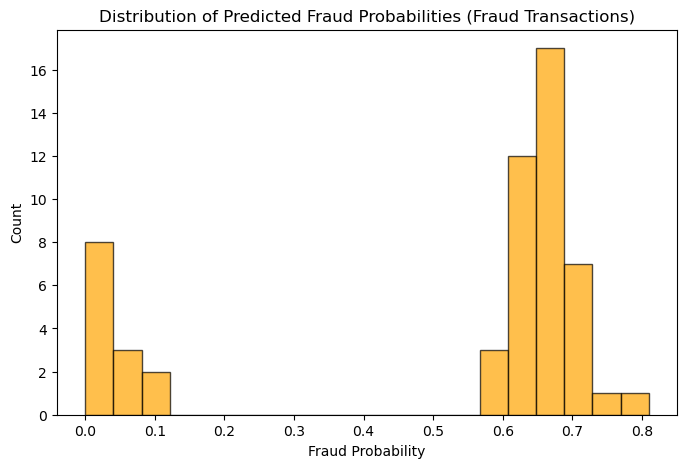

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Load real dataset
real_data = pd.read_csv("creditcard_small.csv")

# Separate features and target
X_real = real_data.drop("Class", axis=1)
y_real = real_data["Class"]

# Scale features
X_scaled = scaler.transform(X_real)

# Predict on the real dataset
y_pred = model.predict(X_scaled)
y_proba = model.predict_proba(X_scaled)[:, 1]

# Create a DataFrame with actual, prediction, and probability
results = real_data.copy()
results["Prediction"] = y_pred
results["Fraud_Probability"] = y_proba

# Filter only fraud rows
fraud_results = results[results["Class"] == 1]

# Compute metrics on frauds
recall = recall_score(fraud_results["Class"], fraud_results["Prediction"])
precision = precision_score(fraud_results["Class"], fraud_results["Prediction"])
f1 = f1_score(fraud_results["Class"], fraud_results["Prediction"])
avg_prob = fraud_results["Fraud_Probability"].mean()

print("🔹 Fraud Detection Metrics on Real Fraud Transactions:")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Average Fraud Probability: {avg_prob:.2f}")

# Plot histogram of fraud probabilities
plt.figure(figsize=(8,5))
plt.hist(fraud_results["Fraud_Probability"], bins=20, color='orange', edgecolor='k', alpha=0.7)
plt.title("Distribution of Predicted Fraud Probabilities (Fraud Transactions)")
plt.xlabel("Fraud Probability")
plt.ylabel("Count")
plt.show()


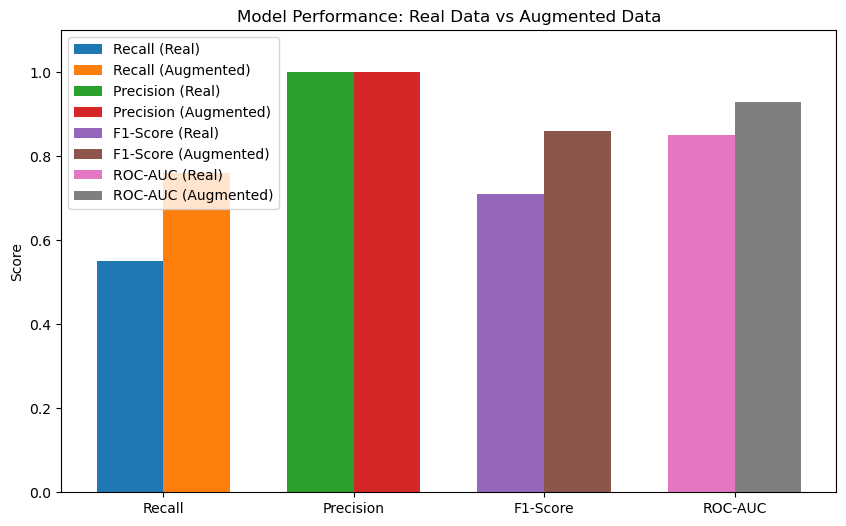

✅ Chart saved as model_performance_comparison.png


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics collected from your evaluation
metrics = {
    "Recall": [0.55, 0.76],       # Real-only vs Augmented
    "Precision": [1.0, 1.0],
    "F1-Score": [0.71, 0.86],
    "ROC-AUC": [0.85, 0.93]
}

labels = ["Real Data", "Augmented Data"]

# Create bar plots
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

for i, metric in enumerate(metrics):
    ax.bar(x[i] - width/2, metrics[metric][0], width, label=f"{metric} (Real)")
    ax.bar(x[i] + width/2, metrics[metric][1], width, label=f"{metric} (Augmented)")

ax.set_xticks(x)
ax.set_xticklabels(list(metrics.keys()))
ax.set_ylabel("Score")
ax.set_title("Model Performance: Real Data vs Augmented Data")
ax.legend()
plt.ylim(0,1.1)
plt.show()

# ✅ Save the chart AFTER plotting
fig.savefig("model_performance_comparison.png", dpi=300, bbox_inches='tight')
print("✅ Chart saved as model_performance_comparison.png")


In [19]:
import joblib

# Metrics from 3_Model_Training.ipynb evaluation
metrics = {
    "Recall": [0.55, 0.76],       # Real-only vs Augmented
    "Precision": [1.0, 1.0],
    "F1-Score": [0.71, 0.86],
    "ROC-AUC": [0.85, 0.93]
}

joblib.dump(metrics, "metrics.pkl")
print("✅ Metrics saved as metrics.pkl")

✅ Metrics saved as metrics.pkl


In [ ]:
import nest_asyncio
from flask import Flask, request, jsonify

# Apply patch for Jupyter
nest_asyncio.apply()

# Flask app
app = Flask(__name__)

@app.route("/", methods=["GET"])
def home():
    return jsonify({"message": "API is running 🚀"})

# Run Flask app
if __name__ == "__main__":
    app.run(port=5000, debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [ ]:
import requests
import pandas as pd

# Load dataset if not already
real_data = pd.read_csv("creditcard_small.csv")
feature_columns = real_data.drop("Class", axis=1).columns.tolist()

# Function to send features to API and get prediction
def get_prediction(features):
    response = requests.post(
        "http://127.0.0.1:5000/predict",
        json={"features": features}
    )
    return response.json()

# Pick a random normal row
normal_row = real_data[real_data["Class"] == 0].sample(1, random_state=42)
normal_features = normal_row.drop("Class", axis=1).values[0].tolist()

# Pick a random fraud row
fraud_row = real_data[real_data["Class"] == 1].sample(1, random_state=42)
fraud_features = fraud_row.drop("Class", axis=1).values[0].tolist()

# Get predictions
normal_pred = get_prediction(normal_features)
fraud_pred = get_prediction(fraud_features)

# Display results
print("✅ Normal Transaction Prediction:")
print(f"Prediction: {normal_pred['prediction']}, Fraud Probability: {normal_pred['fraud_probability']:.2f}\n")

print("🔥 Fraud Transaction Prediction:")
print(f"Prediction: {fraud_pred['prediction']}, Fraud Probability: {fraud_pred['fraud_probability']:.2f}")
